# Objective
Build and train a Convolutional Neural Network (CNN) for image classification using the MNIST dataset.

## **Convolutional Neural Networks (CNNs):**
* A **CNN** is a class of deep learning models designed to analyze visual data like images.
* They are inspired by the human visual system, focusing on detecting local patterns like edges, corners, and textures.

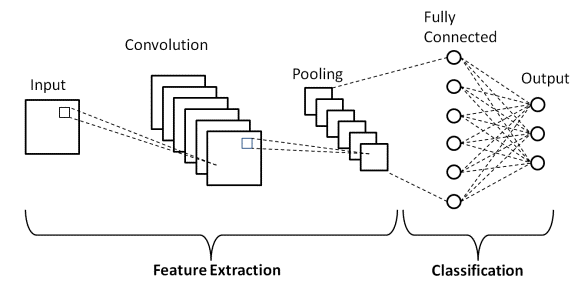

## Components of CNN:
**1. Convolutional Layers:**
* Perform the core operation of CNNs – convolution, where a filter (or kernel) slides over the image.
* The filter extracts meaningful features such as edges, shapes, or textures by applying local patterns.
* Formula: Convolution = applying a filter/kernel to the input image by sliding it across the image.

Let’s say we apply a **3x3 filter** to detect edges. For example, if we apply a filter to detect **horizontal edges** in an image, the filter will slide across the image and detect regions with strong horizontal gradients.

Output of Convolution: The result is called a feature map, showing how much each part of the image contains the feature detected by the filter.
Example of applying a 3x3 filter to detect vertical edges:

In [ ]:
filter = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])  # A filter to detect vertical edges

**2. Pooling Layers:**
* Reduce the spatial dimensions of the feature maps (output of convolution layers) to reduce computational complexity and avoid overfitting.

Types of pooling:
* Max Pooling: Selects the maximum value from a pooling region (e.g., 2x2).
* Average Pooling: Averages the values in the pooling region.


https://deeplizard.com/resource/pavq7noze3 -> Max pooling demo

Suppose we have a feature map from the convolution layer detecting horizontal edges. Applying 2x2 max pooling takes the maximum value from each 2x2 region.

Original feature map:

In [ ]:
1  2  3
4  5  6
7  8  9

SyntaxError: invalid syntax (<ipython-input-3-4c8487d4addd>, line 1)

In [ ]:
#After 2x2 Max Pooling:

5  6
9  9


#The values shrink, but essential information is kept.

**3. Dense (Fully Connected) Layers:**
* Fully connected layers combine extracted features and map them to the final output.
* Used to classify the input based on the learned features.

After convolution and pooling, we have a flattened vector representing the most important features detected by the CNN.
For example, the flattened feature vector might be something like:

In [ ]:
[0.7, 0.3, 0.9, 0.5, ...]

These features are then passed through fully connected dense layers that combine them to classify the image into digits.

## Why Use CNNs for Image Classification (MNIST Dataset):
The MNIST dataset consists of grayscale **28x28 pixel images** of handwritten digits (0-9).
CNNs are well-suited for image data because they:
* Automatically learn spatial hierarchies of features like edges, shapes, and textures.
* Reduce computational complexity by focusing only on significant features.
* Preserve spatial structure due to the use of convolution and pooling layers.

MNIST dataset

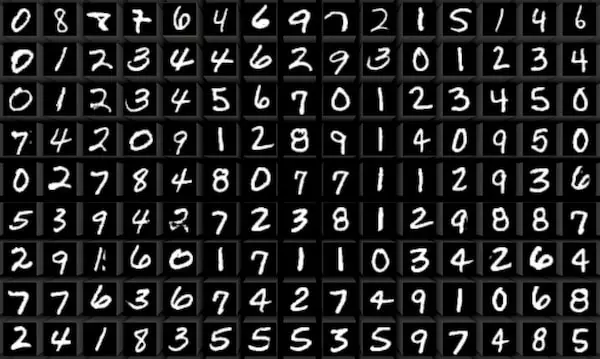

## Artitechure:
**1. Input Layer:**
The input image is resized to 28x28x1 (grayscale).

**2. Convolutional Layers:**
Detect features such as edges, corners, and patterns.

**3. Pooling Layers:**
Reduce dimensionality and make the model invariant to small translations of the features.

**4. Dense Layers:**
Combine extracted features to map them to the final classification output (digits 0-9).

# Implementation
## 1. Loading and Preprocessing the MNIST Dataset:
* The MNIST dataset consists of 28x28 grayscale images of digits (0-9).
* The dataset needs normalization (scaling pixel values to [0, 1]) to ensure the model trains efficiently.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


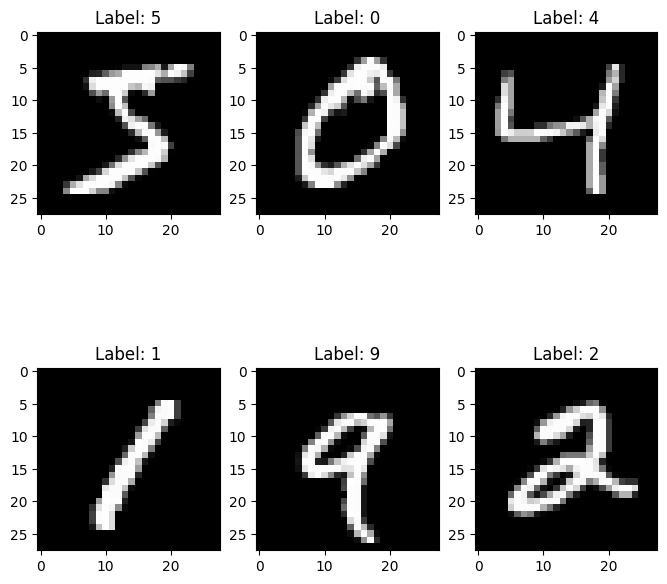

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape to (28, 28, 1) for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

plt.figure(figsize=(8, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i].argmax()}")
plt.show()

* **Normalization:** Helps in preventing the vanishing/exploding gradient problem, improving model convergence.
* **Reshaping:** The CNN expects 3D input (height, width, channels). For MNIST, channels are 1 (grayscale).

In [ ]:
#Normalization: We scale the pixel values from 0-255 to 0-1 to ensure the model trains effectively.
x_train = x_train / 255.0
x_test = x_test / 255.0

## 2. CNN Architecture:
* **Conv2D Layer:**
The Conv2D layer applies filters to the input image. Let’s build a model with two convolutional layers, two pooling layers, and two dense layers.

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Correct input shape
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)


* **Conv2D Layer:**
32 filters of size 3x3, followed by **ReLU activation**.
* **MaxPooling2D Layer:**
Downsamples the output of the convolution layers to reduce spatial dimensions (e.g., 2x2 max-pooling).
* **Dense Layers:**
Flatten the feature maps and feed them to dense layers for classification.

### What is ReLU activation?
The Rectified Linear Unit (ReLU) is one of the most popular activation functions used in neural networks, especially in deep learning models. It has become the default choice in many architectures due to its simplicity and efficiency. The ReLU function is a piecewise linear function that outputs the input directly if it is positive; otherwise, it outputs zero.

in simple words, **make positive values unchanged**, **and negative to 0**.

The ReLU function can be described mathematically as follows:

f(x)=max(0,x)

Where:

* x is the input to the neuron.
* The function returns x if x is greater than 0.
* If x is less than or equal to 0, the function returns 0.

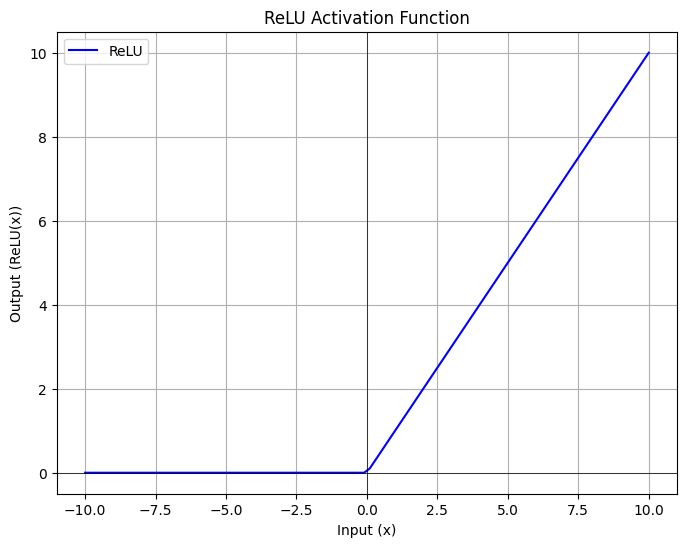

### Some other activation layers
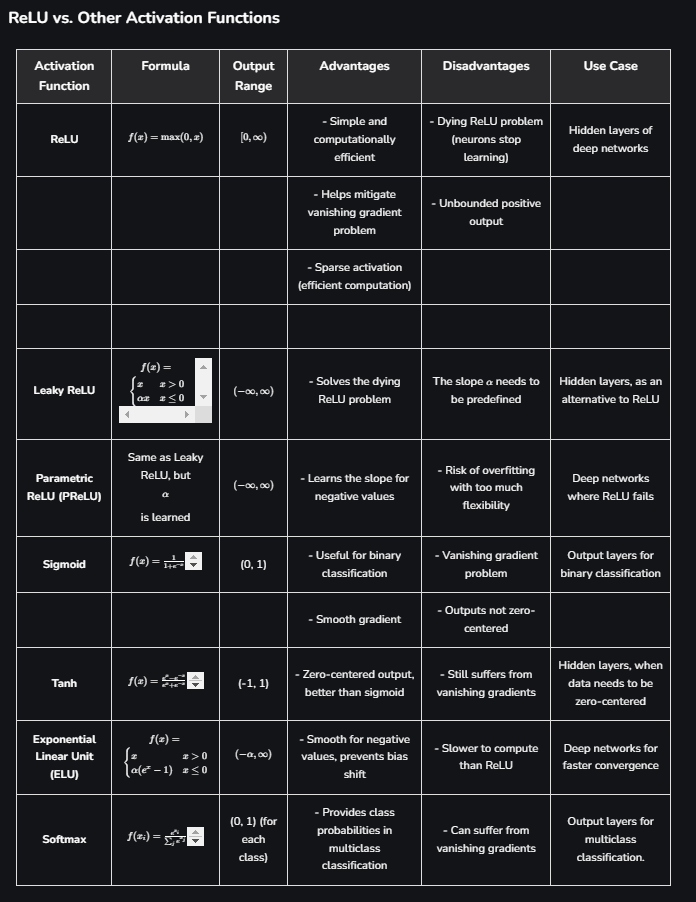

## 3. Compile and Train the Model
* **Sparse Categorical Crossentropy:** Used for multi-class classification tasks like MNIST.
* **Adam Optimizer:** Efficient optimization algorithm.

In [ ]:
model.compile(optimizer='adam',
              loss='crossentropy',  # Use crossentropy
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
model.save('mnist_digit_model.h5')

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 55s 72ms/step - accuracy: 0.8718 - loss: 0.4259 - val_accuracy: 0.9841 - val_loss: 0.0590
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 68ms/step - accuracy: 0.9827 - loss: 0.0589 - val_accuracy: 0.9860 - val_loss: 0.0467
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 66ms/step - accuracy: 0.9889 - loss: 0.0350 - val_accuracy: 0.9875 - val_loss: 0.0403
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 58ms/step - accuracy: 0.9909 - loss: 0.0267 - val_accuracy: 0.9888 - val_loss: 0.0366
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 62ms/step - accuracy: 0.9933 - loss: 0.0200 - val_accuracy: 0.9887 - val_loss: 0.0366
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 57ms/step - accuracy: 0.9951 - loss: 0.0146 - val_accuracy: 0.9906 - val_loss: 0.0364
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9966 - loss: 0.0106 - val_accuracy: 0.9877 - val_loss: 0.0456
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 62ms/step - accuracy: 0.9964 - loss: 0.0106 - 

## 4. Evaluate the Model
After training, we evaluate the model using the test set to calculate the accuracy.

**Confusion Matrix:** This is a crucial evaluation metric, especially for imbalanced classification tasks like MNIST, where all digits should be classified correctly.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9902 - loss: 0.0470
Test Accuracy: 0.9922999739646912
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


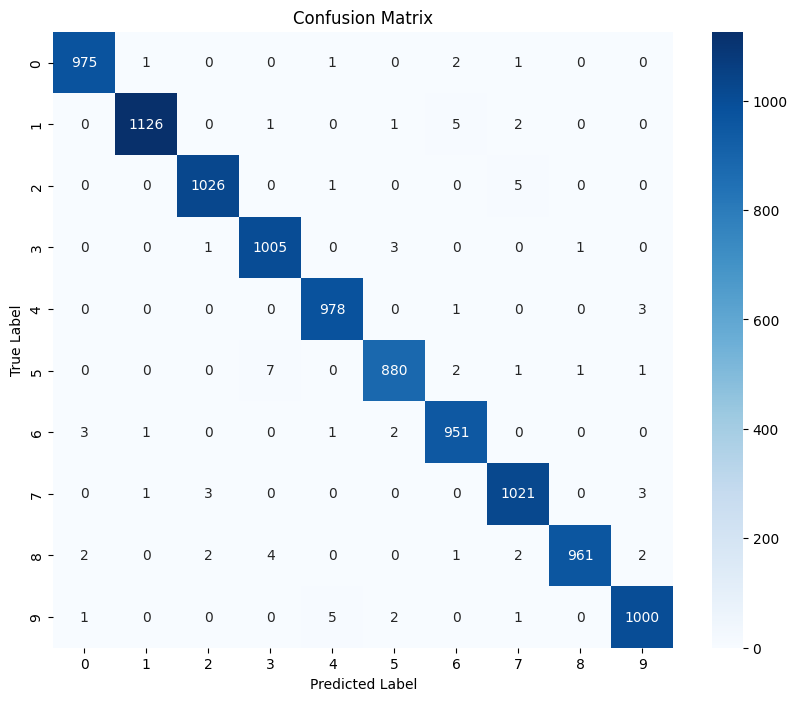

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Generate predictions on the test set
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report for more detailed evaluation
print(classification_report(y_true, y_pred))

## 5. Visualize Training Performance
Plotting the loss and accuracy over epochs to understand how the model is learning.

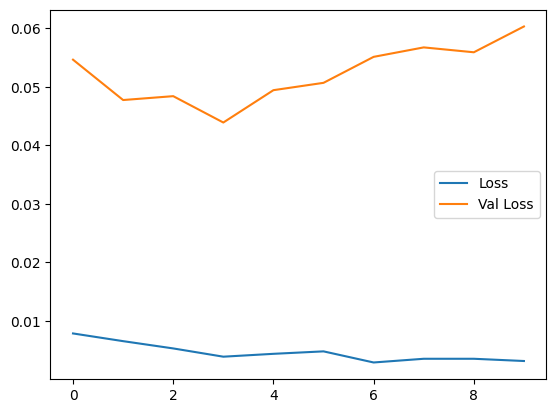

In [ ]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

## 6. Make Predictions and Visualize Results
Finally, visualize some predictions to see how well the model performs.

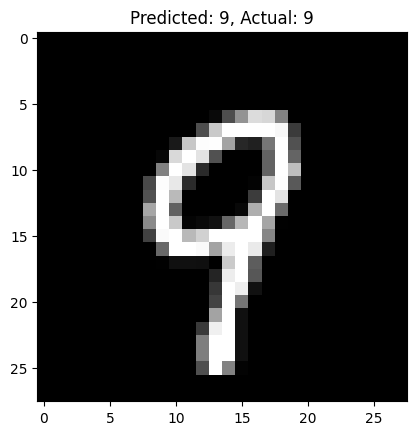

In [ ]:
import numpy as np

index = np.random.randint(0, len(x_test))
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {np.argmax(y_test[index])}")
plt.show()

In [1]:
from IPython.display import display, HTML, Javascript
import tensorflow as tf
import numpy as np
from PIL import Image
from io import BytesIO
import base64

# Step 1: Train the MNIST model
# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the data
x_train = x_train[..., np.newaxis]  # Add channel dimension
x_test = x_test[..., np.newaxis]  # Add channel dimension

# Create and train the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 output classes for digits 0-9
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Step 2: Create the interactive drawing canvas
def create_drawing_canvas():
    canvas_html = '''
    <canvas id="drawingCanvas" width="280" height="280" style="border:1px solid black; background-color: black;"></canvas>
    <button id="clearCanvas">Clear Canvas</button>
    <button id="predictCanvas">Predict Number</button>
    <script>
        const canvas = document.getElementById('drawingCanvas');
        const context = canvas.getContext('2d');
        let drawing = false;

        canvas.addEventListener('mousedown', (e) => {
            drawing = true;
            context.beginPath();
            context.moveTo(e.offsetX, e.offsetY);
        });

        canvas.addEventListener('mouseup', () => drawing = false);

        canvas.addEventListener('mousemove', (e) => {
            if (!drawing) return;
            context.lineWidth = 15; // Set thickness of the brush
            context.lineCap = 'round';
            context.strokeStyle = 'white';
            context.lineTo(e.offsetX, e.offsetY);
            context.stroke();
        });

        document.getElementById('clearCanvas').addEventListener('click', () => {
            context.clearRect(0, 0, canvas.width, canvas.height);
        });

        document.getElementById('predictCanvas').addEventListener('click', () => {
            const dataURL = canvas.toDataURL('image/png');
            google.colab.kernel.invokeFunction('notebook.predict_digit', [dataURL], {});
        });
    </script>
    '''
    display(HTML(canvas_html))

# Display the drawing canvas
create_drawing_canvas()

# Step 3: Preprocess the image and predict the digit
def predict_digit_from_data(data_url):
    # Decode the Base64 image
    header, encoded = data_url.split(",", 1)
    image_data = base64.b64decode(encoded)
    image = Image.open(BytesIO(image_data)).convert('L')  # Convert to grayscale
    image_resized = image.resize((28, 28), Image.Resampling.LANCZOS)  # Resize to 28x28
    image_array = np.array(image_resized).reshape(1, 28, 28, 1).astype('float32') / 255.0  # Normalize

    # Predict the digit
    predicted_class = np.argmax(model.predict(image_array), axis=-1)[0]
    print(f"Predicted Number: {predicted_class}")

# Register the Python function to be invoked from JavaScript
from google.colab import output
output.register_callback('notebook.predict_digit', predict_digit_from_data)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9080 - loss: 0.3049 - val_accuracy: 0.9815 - val_loss: 0.0624
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9833 - loss: 0.0534 - val_accuracy: 0.9817 - val_loss: 0.0549
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9905 - loss: 0.0307 - val_accuracy: 0.9857 - val_loss: 0.0435
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9938 - loss: 0.0203 - val_accuracy: 0.9809 - val_loss: 0.0596
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9950 - loss: 0.0153 - val_accuracy: 0.9865 - val_loss: 0.0452


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
Predicted Number: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Number: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Number: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Number: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Number: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Number: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Number: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Number: 9
